<a href="https://colab.research.google.com/github/unoeyh/works/blob/main/airbnb_ny_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes  import  MultinomialNB 
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics

Import cvs file

the data source is from kaggle - New York City Airbnb Open Data
(https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)


In [ ]:
data = pd.read_csv("/content/AB_NYC_2019.csv")
data

id  ... availability_365
0          2539  ...              365
1          2595  ...              355
2          3647  ...              365
3          3831  ...              194
4          5022  ...                0
...         ...  ...              ...
48890  36484665  ...                9
48891  36485057  ...               36
48892  36485431  ...               27
48893  36485609  ...                2
48894  36487245  ...               23

[48895 rows x 16 columns]

In [ ]:
# To see how many listings are there in this data
data.shape

(48895, 16)

In [ ]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Dropping unnecessary columns

In [ ]:
# The name, ID and the host name of the listing is not related to the price of the listings, therefore it is appropriate to exclude the information
# 
data.drop(['name','id','host_name','last_review','reviews_per_month'], axis=1, inplace=True)

In [ ]:
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Data visuallization

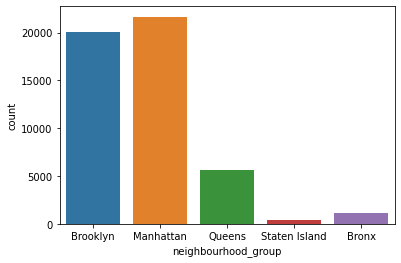

In [ ]:
# The nunber of listings of each disctict('neighbourhood group' in this data)
# We can see Brooklyn and Manhattan take the most of portion

sns.countplot(x="neighbourhood_group", data=data)

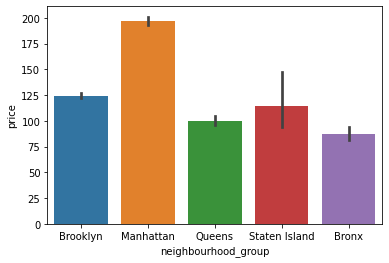

In [ ]:
# The price range of each neighbourhood
# Manhattan is definately the most expensive area, while other distict have similar price range from 75~125
# Noticeably, Staten Island has a high variation of price range

sns.barplot(y="price", x="neighbourhood_group", data=data)

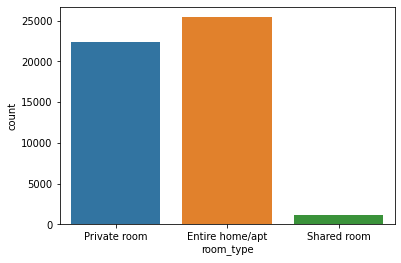

In [ ]:
# The bar-chart respect to room type
# There are very few number of shared room type listings
# The entire room has the highest number, the second most common category is private room type with a relatively small gap

sns.countplot(x="room_type", data=data)

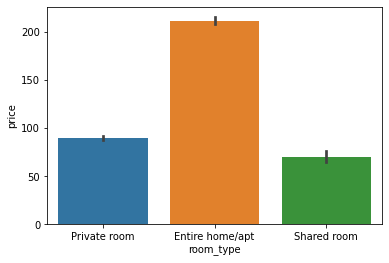

In [ ]:
# Private rooms have the price slight under 100 dollars
# While the Entire apartment type has the proce range above 200 dollars
# Share room type has the most affordable budget range but the difference with Private room is not too large

sns.barplot(y="price", x="room_type", data=data)

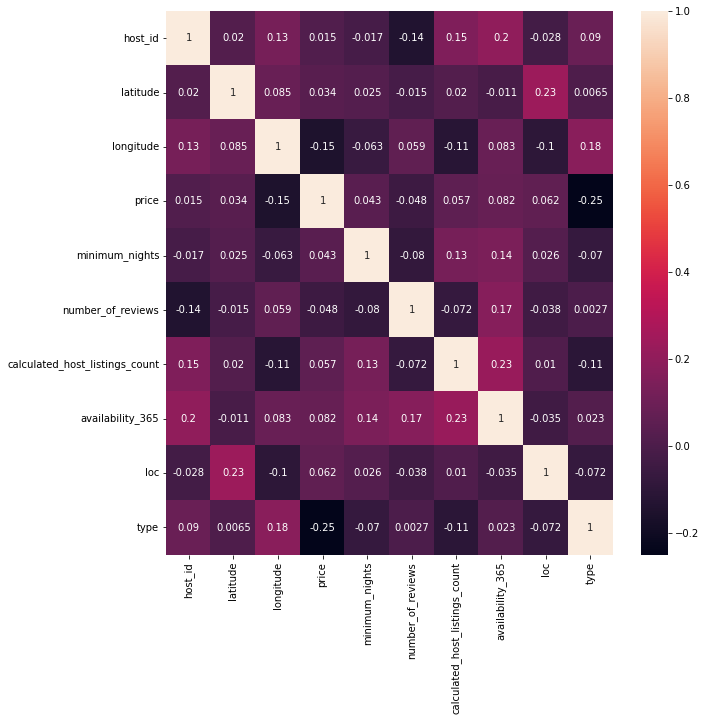

In [ ]:
# Through this correalation matrix, we can see the relation of features

corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

Encoding categorical variables

In [ ]:
# In order to analyse the relationship between features, we need to encode categorical variables such as the name of neighbourhood
# Here, we use Lable Encoder

class_le = LabelEncoder()

In [ ]:
data["loc"] = class_le.fit_transform(data["neighbourhood"].values)
data["type"] = class_le.fit_transform(data["room_type"].values)

In [ ]:
# We will use minimum nights, host listings, availability, location and the room type. Thus we drop other columns.

X = data.drop(["host_id","room_type","neighbourhood","number_of_reviews","neighbourhood_group","latitude","longitude","price"],axis=1)

Y = data["price"]
X.head()

minimum_nights  calculated_host_listings_count  availability_365  loc  type
0               1                               6               365  108     1
1               1                               2               355  127     0
2               3                               1               365   94     1
3               1                               1               194   41     0
4              10                               1                 0   61     0

Split dataset into train and test sets

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42)


**Modelling**

Linear Regression

In [ ]:
lr = LinearRegression().fit(x_train, y_train)
pred_lr = lr.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_lr)))

200.27267094613097


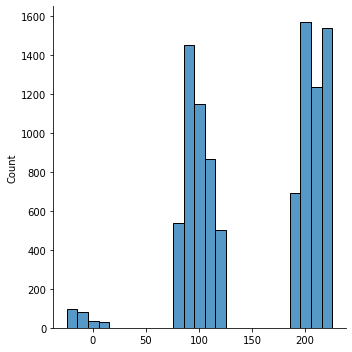

In [ ]:
sns.displot(pred_lr)

In [ ]:
# Comparing the real data and the predicted one

err = pd.DataFrame(np.array(y_test).flatten(),columns=['actual'])
err['prediction']=np.array(pred_lr)
err.head(10)

actual  prediction
0      89  219.033665
1      30  105.062859
2     120   78.905433
3     470  247.757599
4     199  186.066364
5     170  211.141823
6      90   99.217683
7      60  201.707268
8     150  209.522738
9      74  214.415047

In [ ]:
dt = DecisionTreeRegressor().fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_dt)))

234.60578769285905


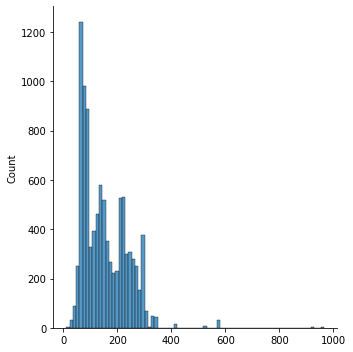

In [ ]:
sns.displot(pred_dt)

In [ ]:
# Comparing the actual data and the prediction

err = pd.DataFrame(np.array(y_test).flatten(),columns=['actual'])
err['prediction']=np.array(pred_dt)
err.head(10)

actual  prediction
0      89  125.000000
1      30   63.000000
2     120  126.461538
3     470  231.000000
4     199  275.000000
5     170  165.000000
6      90   70.254237
7      60  100.000000
8     150  310.000000
9      74  151.000000

Prediction using only the neighbourhood and the room type

In [ ]:
X1 = X[["loc","type"]]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y,test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression().fit(x_train, y_train)
pred_lr = lr.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_lr)))

201.29824066174362


In [ ]:
err = pd.DataFrame(np.array(y_test).flatten(),columns=['actual'])
err['prediction']=np.array(pred_lr)
err.head(10)

actual  prediction
0      89  208.226444
1      30  109.133785
2     120   97.992123
3     470  202.734076
4     199  200.850978
5     170  224.860475
6      90  116.666177
7      60  198.183256
8     150  219.211182
9      74  221.408129

In [ ]:
dt = DecisionTreeRegressor().fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_dt)))

196.97521788048925


In [ ]:
err = pd.DataFrame(np.array(y_test).flatten(),columns=['actual'])
err['prediction']=np.array(pred_dt)
err.head(10)

actual  prediction
0      89  137.927273
1      30   56.215596
2     120  132.954887
3     470  243.769397
4     199  195.669251
5     170  204.955195
6      90   86.192817
7      60  135.857143
8     150  342.510204
9      74  140.571429